
# Big Ideas Final Project
## Metric: Overdose Deaths
### Lukas Finn

For my analysis of what neighborhood is the best to live in I chose the metric to be the least amount of overdose deaths.


Some basic statistics from the data.

In [2]:
import pandas as pd
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt

dose = pd.read_csv("overdosedata.tsv",sep='\t')

casecount = len(dose)

aveage = dose['age'].mean()

se = dose['sex'].value_counts()

zipcount = dict()
for line in dose:
    zipcol = dose['incident_zip']
    for item in zipcol:
        if item in zipcount:
            zipcount[item] += 1
        else:
            zipcount[item] = 1
for zipcode, value in zipcount.items():
    zipcount[zipcode] = int(value/19)

print('Number of cases:',casecount)
print('\n''Average age of victim:',aveage)
print('\n''Number of male (M) and female (F) victims:''\n')
print(se)

cause = dict()
for line in dose:
    causecol = dose['combined_od1']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od2']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od3']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od4']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od5']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od6']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od7']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od8']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1

for reason, value in cause.items():
    cause[reason] = int(value/19)
causelist = sorted(cause.items(), key = lambda x:x[1])
cause = dict(causelist)
print('\n''Top 10 causes of overdose counts:''\n')
for x in causelist[158:168]:
    print (x)

Number of cases: 5832

Average age of victim: 41.818930041152264

Number of male (M) and female (F) victims:

M    4004
F    1827
Name: sex, dtype: int64

Top 10 causes of overdose counts:

('Diazepam', 281)
('Morphine', 368)
('Methadone', 443)
('Acetyl Fentanyl', 453)
('Oxycodone', 542)
('Alprazolam', 701)
('Alcohol', 1358)
('Cocaine', 2200)
('Heroin', 2390)
('Fentanyl', 2912)


In [58]:
neighborhoodscount = dict()

neighborhoodscount['Allegheny Center']= zipcount['15212']
neighborhoodscount['Allegheny West']= zipcount['15233'] + zipcount['15212']
neighborhoodscount['Allentown']= zipcount['15210']
neighborhoodscount['Arlington']= zipcount['15210']
neighborhoodscount['Arlington Heights']= zipcount['15210']
neighborhoodscount['Banksville']= zipcount['15220'] + zipcount['15216']
neighborhoodscount['Bedford Dwellings']= zipcount['15219']
neighborhoodscount['Beechview']= zipcount['15216']
neighborhoodscount['Beltzhoove']= zipcount['15210']
neighborhoodscount['Bloomfield']= zipcount['15224']
neighborhoodscount['Bluff']= zipcount['15219']
neighborhoodscount['Bon Air']= zipcount['15226'] + zipcount['15210']
neighborhoodscount['Brighton Heights']= zipcount['15212']
neighborhoodscount['Brookline']=  zipcount['15226']
neighborhoodscount['California-Kirkbride']= zipcount['15212'] +  zipcount['15233']
neighborhoodscount['Carrick']= zipcount['15210'] +  zipcount['15227']
neighborhoodscount['Central Business District']=  zipcount['15222']
neighborhoodscount['Central Lawrenceville']= zipcount['15201']
neighborhoodscount['Central Northside']= zipcount['15212']
neighborhoodscount['Central Oakland']= zipcount['15213']
neighborhoodscount['Chartiers']= zipcount['15204']
neighborhoodscount['Chateau']= zipcount['15233']
neighborhoodscount['Crafton Heights']= zipcount['15205']
neighborhoodscount['Crawford-Roberts']= zipcount['15219']
neighborhoodscount['Duquesne Heights']= zipcount['15211']
neighborhoodscount['East Allegheny']= zipcount['15212']
neighborhoodscount['East Carnegie']= zipcount['15206']
neighborhoodscount['East Hills']= zipcount['15221']
neighborhoodscount['East Liberty']= zipcount['15206']
neighborhoodscount['Elliott']= zipcount['15220']
neighborhoodscount['Esplen']= zipcount['15204']
neighborhoodscount['Fairywood']= zipcount['15205']
neighborhoodscount['Fineview']= zipcount['15212'] +  zipcount['15214']
neighborhoodscount['Friendship']= zipcount['15232']
neighborhoodscount['Garfield']= zipcount['15224']
neighborhoodscount['Glen Hazel']= zipcount['15207'] +  zipcount['15217']
neighborhoodscount['Greenfield']= zipcount['15207'] +  zipcount['15217']
neighborhoodscount['Hays']=  zipcount['15227'] + zipcount['15207'] + zipcount['15236']
neighborhoodscount['Hazelwood']= zipcount['15207']
neighborhoodscount['Highland Park']= zipcount['15206']
neighborhoodscount['Homewood North']= zipcount['15221'] + zipcount['15208']
neighborhoodscount['Homewood South']= zipcount['15221'] + zipcount['15208']
neighborhoodscount['Homewood West']= zipcount['15206'] +  zipcount['15208']
neighborhoodscount['Knoxville']= zipcount['15210']
neighborhoodscount['Larimer']= zipcount['15206']
neighborhoodscount['Lincoln–Lemington–Belmar']= zipcount['15206'] + zipcount['15147'] + zipcount['15215']
neighborhoodscount['Lincoln Place']= zipcount['15207']
neighborhoodscount['Lower Lawrenceville']= zipcount['15201']
neighborhoodscount['Manchester']= zipcount['15233']
neighborhoodscount['Marshall-Shadeland']= zipcount['15212'] + zipcount['15214']
neighborhoodscount['Middle Hill']= zipcount['15219']
neighborhoodscount['Morningside']= zipcount['15201'] + zipcount['15206']
neighborhoodscount['Mount Oliver']= zipcount['15210']
neighborhoodscount['Mount Washington']= zipcount['15211']
neighborhoodscount['New Homestead']=  zipcount['15207']
neighborhoodscount['North Oakland']= zipcount['15213']
neighborhoodscount['North Point Breeze']= zipcount['15208']
neighborhoodscount['North Shore']= zipcount['15212']
neighborhoodscount['Northview Heights']= zipcount['15212'] +  zipcount['15214']
neighborhoodscount['Oakwood']= zipcount['15205']
neighborhoodscount['Overbrook']= zipcount['15227'] + zipcount['15234'] + zipcount['15210']
neighborhoodscount['Perry North']= zipcount['15212'] + zipcount['15214']
neighborhoodscount['Perry South']= zipcount['15214']
neighborhoodscount['Point Breeze']= zipcount['15217'] + zipcount['15208']
neighborhoodscount['Polish Hill']= zipcount['15219']
neighborhoodscount['Regent Square']= zipcount['15218']
neighborhoodscount['Ridgemont']= zipcount['15220'] + zipcount['15216']
neighborhoodscount['Saint Clair']= zipcount['15210']
neighborhoodscount['Shadyside']= zipcount['15206'] + zipcount['15213'] +  zipcount['15232']
neighborhoodscount['Sheraden']=  zipcount['15204']
neighborhoodscount['South Oakland']= zipcount['15213']
neighborhoodscount['Southshore']= zipcount['15219']
neighborhoodscount['South Side Flats']= zipcount['15203']
neighborhoodscount['South Side Slopes']=  zipcount['15203'] + zipcount['15210']
neighborhoodscount['Spring Garden']= zipcount['15212']
neighborhoodscount['Spring Hill–City View']= zipcount['15212']
neighborhoodscount['Squirrel Hill North']= zipcount['15217']
neighborhoodscount['Squirrel Hill South']= zipcount['15217']
neighborhoodscount['Stanton Heights']= zipcount['15201'] + zipcount['15206']
neighborhoodscount['Strip District']= zipcount['15222']
neighborhoodscount['Summer Hill']= zipcount['15214']
neighborhoodscount['Swisshelm Park']= zipcount['15218']
neighborhoodscount['Terrace Village']= zipcount['15219']
neighborhoodscount['Troy Hill']= zipcount['15212']
neighborhoodscount['Upper Hill']= zipcount['15219']
neighborhoodscount['Upper Lawrenceville']= zipcount['15201']
neighborhoodscount['West End']= zipcount['15220']
neighborhoodscount['West Oakland']= zipcount['15213']
neighborhoodscount['Westwood']= zipcount['15205'] + zipcount['15220']
neighborhoodscount['Windgap']= zipcount['15204']

hoodlist = sorted(neighborhoodscount.items(), key = lambda x:x[1])
neighborhoodscount = dict(hoodlist)
print('Top 10 neighborhoods with lowest overdose counts:''\n')
for x in hoodlist[0:10]:
    print (x)
print('\n''Top 10 neighborhoods with highest overdose counts:''\n')
for x in hoodlist[80:90]:
    print (x)

Top 10 neighborhoods with lowest overdose counts:

('Chateau', 14)
('Manchester', 14)
('Friendship', 15)
('Central Business District', 36)
('Strip District', 36)
('Squirrel Hill North', 39)
('Squirrel Hill South', 39)
('Central Oakland', 44)
('North Oakland', 44)
('South Oakland', 44)

Top 10 neighborhoods with highest overdose counts:

('Saint Clair', 295)
('Fineview', 309)
('Marshall-Shadeland', 309)
('Northview Heights', 309)
('Perry North', 309)
('Hays', 324)
('South Side Slopes', 371)
('Bon Air', 401)
('Carrick', 441)
('Overbrook', 499)


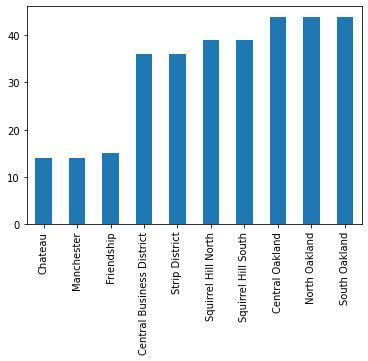

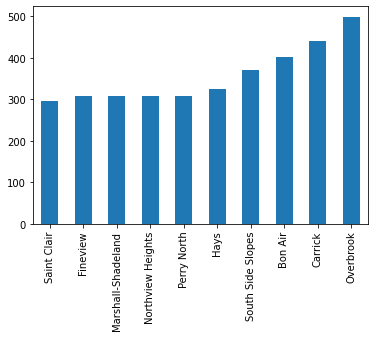

In [113]:
hoodframe = pd.DataFrame(neighborhoodscount.values(), index = neighborhoodscount.keys())
hoodframe[0:10].plot.bar(legend = False)
hoodframe[80:90].plot.bar(legend = False)

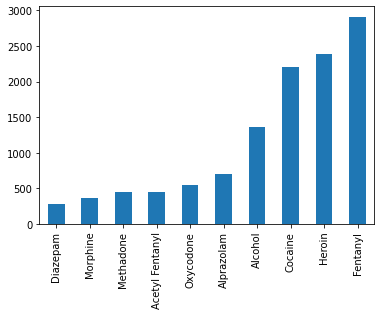

In [112]:
causeframe = pd.DataFrame(cause.values(), index = cause.keys())
causeframe[158:168].plot.bar(legend = False)

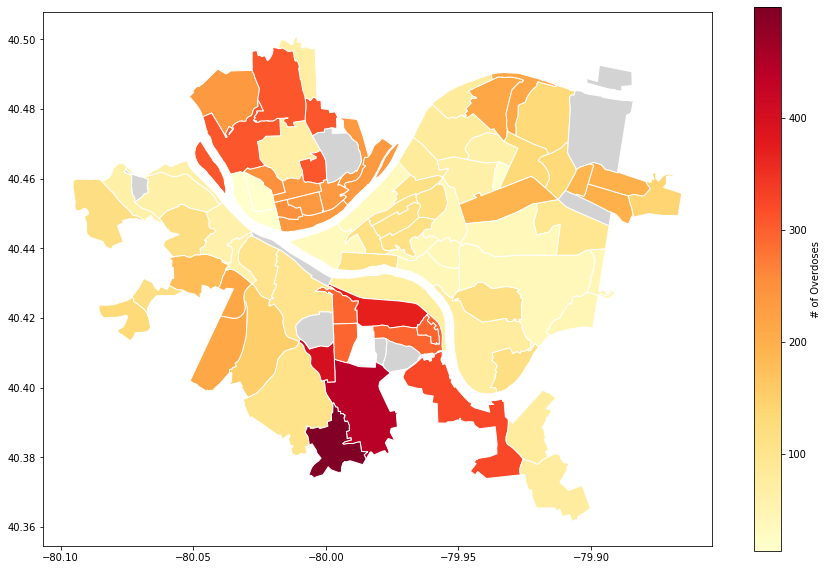

In [111]:
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")

hoods = neighborhoodscount.keys()
doses = neighborhoodscount.values()
hoodframe2 = pd.DataFrame({'Neighborhood': hoods, 'Overdoses': doses})

overmap = neighborhoods.merge(hoodframe2, how='left', left_on='hood', right_on='Neighborhood')
overmap.plot(column='Overdoses', 
               cmap='YlOrRd',              
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "# of Overdoses"},
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )